<h1 align = "center"> LINEAR REGRESSION</h1>

<h1 align = "center"> USING SALINITY TO PREDICT TEMPERATURE OF WATER</h1>

#<h2>Nithin Shanmugam V (RA1911026020087)</h2>

#<h2>Subject: VAC</h2>

#<h3> Importing libraries</h3>

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#<h3> Importing Dataset</h3>

In [4]:
dataset = pd.read_csv("/content/temp-salinity-final.csv")

In [5]:
dataset

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,Salnty,T_degC
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,33.440,10.50
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,33.440,10.46
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,33.437,10.46
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,33.420,10.45
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,33.421,10.45
...,...,...,...,...,...,...,...
99995,3383,99996,074.0 053.0,19-5109PT-HY-251-0042-07400530-0057A-3,57,NaN,10.16
99996,3383,99997,074.0 053.0,19-5109PT-HY-251-0042-07400530-0075A-7,75,NaN,9.56
99997,3383,99998,074.0 053.0,19-5109PT-HY-251-0042-07400530-0078A-3,78,NaN,9.46
99998,3383,99999,074.0 053.0,19-5109PT-HY-251-0042-07400530-0100A-7,100,NaN,9.19


In [6]:
dataset1 = dataset

#<h3> Slicing the dat set - Removing the columns</h3>

In [7]:
dataset1 = dataset1.drop(columns=["Cst_Cnt","Btl_Cnt", "Sta_ID", "Depth_ID",	"Depthm"])

In [8]:
dataset1 = dataset1.dropna()

In [9]:
print(dataset1)

       Salnty  T_degC
0      33.440   10.50
1      33.440   10.46
2      33.437   10.46
3      33.420   10.45
4      33.421   10.45
...       ...     ...
99869  33.340   11.90
99914  33.240   13.25
99940  33.260   13.43
99965  33.330   12.76
99989  33.330   14.28

[73611 rows x 2 columns]


#<h3>Segregate and reshape the dataset</h3>

In [10]:
x = dataset1.iloc[:,0]

In [11]:
x.shape

(73611,)

In [12]:
x = dataset1.iloc[:,0].values.reshape(-1,1)

In [13]:
x.shape

(73611, 1)

In [14]:
y = dataset1.iloc[:,-1].values.reshape(-1,1)

In [15]:
y.shape

(73611, 1)

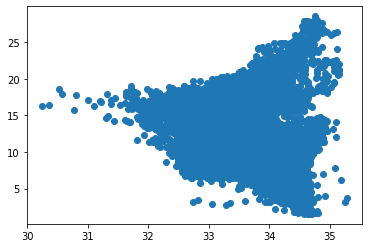

In [16]:
plt.scatter(x,y)
plt.show()

#<h3>Split the dataset into training and test set</h3>

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#<h3>Check training and test dataset</h3>

In [19]:
x_train.shape

(58888, 1)

In [20]:
x_test.shape

(14723, 1)

In [21]:
y_train.shape

(58888, 1)

In [22]:
y_test.shape

(14723, 1)

#<h3>Import the function for linear regression</h3>

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#<h3>Predict the temperature(by using salinity) using test dataset</h3>

In [26]:
y_pred = lm.predict(x_test)

In [27]:
y_pred

array([[ 9.66477562],
       [ 7.96539726],
       [11.36415398],
       ...,
       [12.5324766 ],
       [10.19583136],
       [ 9.77098677]])

#<h3>Check the prediction</h3>

In [28]:
check = pd.DataFrame(x_test, columns = ['Salinity'])

In [29]:
check

,Salinity
0,33.80
1,34.12
2,33.48
3,33.88
4,33.51
...,...
14718,33.45
14719,33.40
14720,33.26
14721,33.70


In [30]:
check['Temperature_Actual'] = y_test

In [31]:
check

,Salinity,Temperature_Actual
0,33.80,9.07
1,34.12,4.91
2,33.48,14.93
3,33.88,6.83
4,33.51,14.53
...,...,...
14718,33.45,14.85
14719,33.40,14.20
14720,33.26,8.93
14721,33.70,19.54


In [32]:
check['Temperature_Predicted'] = y_pred

In [33]:
check

,Salinity,Temperature_Actual,Temperature_Predicted
0,33.80,9.07,9.664776
1,34.12,4.91,7.965397
2,33.48,14.93,11.364154
3,33.88,6.83,9.239931
4,33.51,14.53,11.204837
...,...,...,...
14718,33.45,14.85,11.523471
14719,33.40,14.20,11.788999
14720,33.26,8.93,12.532477
14721,33.70,19.54,10.195831


#<h3>Check using regression line</h3>

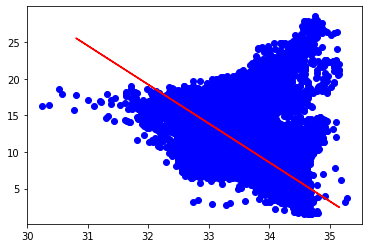

In [34]:
plt.scatter(x,y, color = 'blue')
plt.plot(x_test,y_pred,color = 'red')